In [82]:
library("DESeq2")
package.version("DESeq2")
#Version says 1.22.1

#activating phyloseq
#BiocManager::install("phyloseq")
library("phyloseq")
package.version("phyloseq")
#Version says 1.26.0

library("ggplot2")
packageVersion("ggplot2")
#Package version of ggplot2 is 3.1.0

library("biomformat")
packageVersion("biomformat")
#Package version of biomformat is 1.10.0

library("vegan")
packageVersion('vegan')
#Package version of vegen is 2.5.3

library("grid")
packageVersion('grid')
#Package version of grid is 3.5.1

library(magrittr)
packageVersion('magrittr')
#Package version of magrittr is 1.5

library(dplyr)
packageVersion("dplyr")
#Package version of dplyr is 0.7.8

library(plyr)
packageVersion("plyr")
#Package version of plyr is 1.8.4

library(broom)
packageVersion("broom")
#Package version of broom is 0.5.1

library('stringr')
packageVersion("stringr")
#Package version of stringr is 1.3.1

library('knitr')
packageVersion('knitr')
#Package version of knitr is 1.21

package.version("BiocManager")
#Version says 1.30.4

R.version
#R version is 3.5.1

[1] "1.18.1"

[1] "1.22.3"

[1] ‘3.2.1’

[1] ‘1.6.0’

[1] ‘2.5.6’

[1] ‘3.4.1’

[1] ‘1.5’

[1] ‘0.8.4’

[1] ‘1.8.5’

[1] ‘0.5.4’

[1] ‘1.4.0’

[1] ‘1.28’

[1] "1.30.10"

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

In [83]:
#Importing Qiime1 data
biom_all_mice <- import_biom(BIOMfilename = "otu_table_filtered_s24-json.biom"
            ,treefilename = "rep_set.tre"
            ,parseFunction = parse_taxonomy_greengenes)

#Importing mapping file
mapping_file <- import_qiime_sample_data(mapfilename = "mapping_file_cohousing2018.tsv")

#Merging both mapping file phyloseq object and biom file phyloseq data
physeq <- merge_phyloseq(biom_all_mice, mapping_file)

#Correcting taxonomic names
#colnames(tax_table(phy_main_v2))= c("Kingdom","Phylum","Class","Order","Family","Genus","Species")

#Showing the taxonomic names of phyloseq object
#rank_names(phy_main)

Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_de

Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”
Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_de

In [84]:
sample_data(physeq)$Category <- factor(
  sample_data(physeq)$Category, 
  levels = c("Placebo", "Letrozole")
)
physeq.pt = subset_samples(physeq, Week != '0') # removing time 0
# Subset data by time
physeq.pt.time0 = subset_samples(physeq, Week != '1' & Week!='3' & Week!='4' & Week!='5' & Week!='2') 
physeq.pt.time2 = subset_samples(physeq.pt, Week != '1' & Week!='3' & Week!='4' & Week!='5') 
physeq.pt.time5 = subset_samples(physeq.pt, Week != '1' & Week!='3' & Week!='4' & Week!='2') 
physeq.pt.time1 = subset_samples(physeq.pt, Week != '2' & Week!='3' & Week!='4' & Week!='5') 
physeq.pt.time3 = subset_samples(physeq.pt, Week != '1' & Week!='5' & Week!='4' & Week!='2')
physeq.pt.time4 = subset_samples(physeq.pt, Week!= '1' & Week!='3' & Week!='2' & Week!='5')

In [85]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2560 taxa and 95 samples ]
sample_data() Sample Data:       [ 95 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 2560 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2560 tips and 2559 internal nodes ]

## TIME POINT 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23146   30498   35890   35555   40235   48865 

[1] "Number of Samples in our Biom Table"


[1] 16

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23146   30498   35890   35555   40235   48865 

585.T0 571.T0 584.T0 570.T0 586.T0 583.T0 581.T0 575.T0 578.T0 580.T0 582.T0 
 23146  27048  29091  30082  30636  30837  33018  33321  38459  39022  39868 
577.T0 576.T0 574.T0 572.T0 573.T0 
 40060  40759  41233  43433  48865

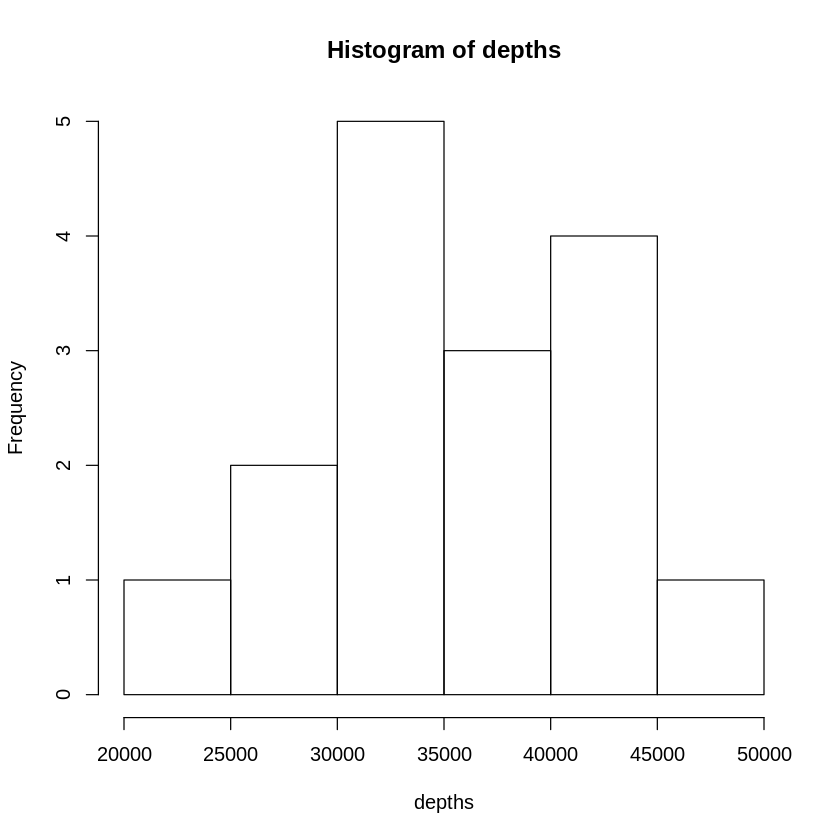

In [86]:
depths <- sample_sums(physeq.pt.time0)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time0)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time0)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time0)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time0)),25)

In [87]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time0, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time0)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

63OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [88]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time0_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 0")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000341 0.0003405 0.0228    999  0.875
Residuals 14 0.209304 0.0149503                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000341 0.0003405 0.0228    999  0.876
Residuals 14 0.209304 0.0149503                     

png 
  2

In [89]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(2)
a=adonis(d ~ Category, df, permutations=999, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.07731951,0.07731951,0.9032423,0.0606071,0.44
Residuals,14,1.19843049,0.08560218,NA,0.9393929,NA
Total,15,1.27574999,NA,NA,1.0000000,NA


## TIME POINT 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13082   26019   34012   32594   39784   44332 

[1] "Number of Samples in our Biom Table"


[1] 16

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13082   26019   34012   32594   39784   44332 

581.T1 586.T1 578.T1 585.T1 576.T1 570.T1 574.T1 571.T1 580.T1 583.T1 575.T1 
 13082  22275  22655  24563  26504  29146  32512  32997  35027  36479  36980 
572.T1 577.T1 573.T1 584.T1 582.T1 
 39177  41603  41969  42195  44332

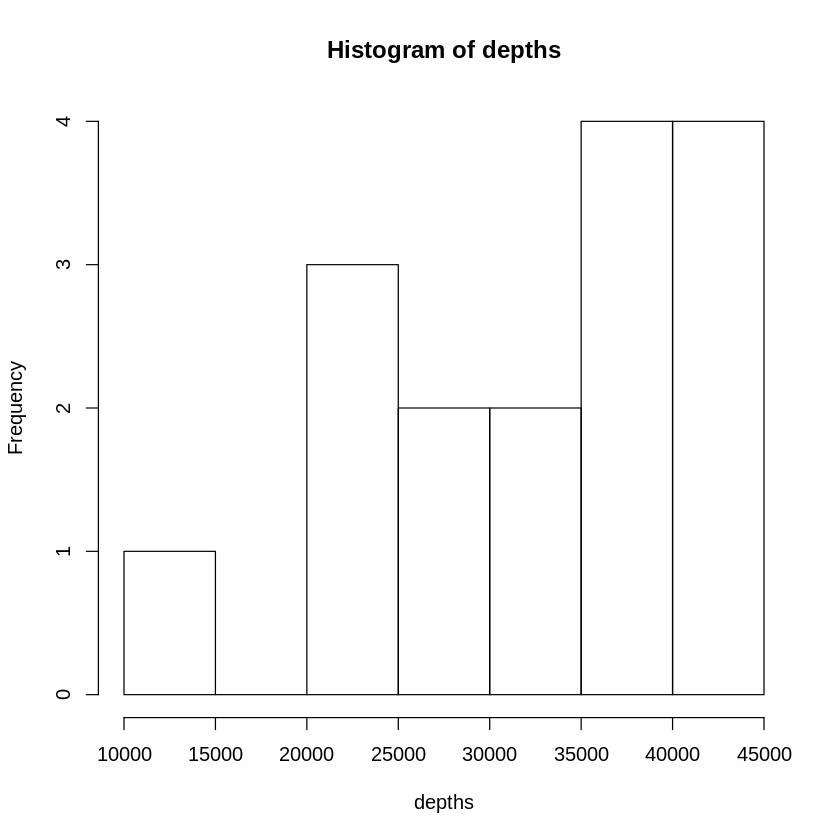

In [90]:
depths <- sample_sums(physeq.pt.time1)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time1)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time1)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time1)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time1)),25)

In [91]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time1, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time1)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

81OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [92]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time1_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 1")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.002962 0.0029618 0.3829    999  0.562
Residuals 14 0.108287 0.0077348                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.002962 0.0029618 0.3829    999  0.563
Residuals 14 0.108287 0.0077348                     

png 
  2

In [93]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(2)
a=adonis(d ~ Category, df, permutations=999, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.05760383,0.05760383,1.001679,0.0667711,0.382
Residuals,14,0.80510218,0.05750730,NA,0.9332289,NA
Total,15,0.86270601,NA,NA,1.0000000,NA


## TIME POINT 2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11386   18104   22188   21583   24759   32276 

[1] "Number of Samples in our Biom Table"


[1] 16

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11386   18104   22188   21583   24759   32276 

585.T2 586.T2 571.T2 584.T2 581.T2 572.T2 577.T2 575.T2 573.T2 583.T2 582.T2 
 11386  11619  13238  17211  18401  18615  19366  22154  22222  23061  23647 
580.T2 578.T2 570.T2 576.T2 574.T2 
 24061  26854  30514  30703  32276

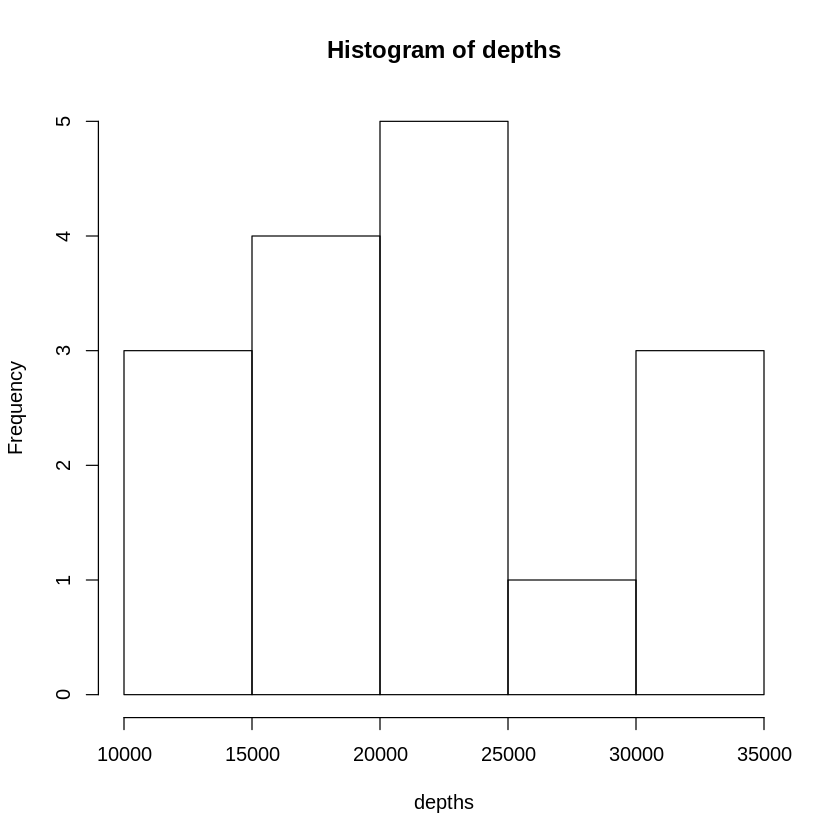

In [94]:
depths <- sample_sums(physeq.pt.time2)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time2)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time2)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time2)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time2)),25)

In [95]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time2, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time2)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

197OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [96]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time2_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 2")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.017539 0.0175385 2.5797    999  0.128
Residuals 14 0.095180 0.0067986                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.017539 0.0175385 2.5797    999  0.134
Residuals 14 0.095180 0.0067986                     

png 
  2

In [101]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(6)
a=adonis(d ~ Category, df, permutations=999, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.1088999,0.10889987,2.025891,0.1264136,0.12
Residuals,14,0.7525569,0.05375406,NA,0.8735864,NA
Total,15,0.8614568,NA,NA,1.0000000,NA


## TIME POINT 3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13829   23919   29890   28584   32822   42401 

[1] "Number of Samples in our Biom Table"


[1] 16

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13829   23919   29890   28584   32822   42401 

586.T3 572.T3 581.T3 585.T3 583.T3 577.T3 576.T3 582.T3 571.T3 573.T3 575.T3 
 13829  15066  18086  22607  24356  26062  29021  29582  30197  30356  30374 
580.T3 574.T3 584.T3 570.T3 578.T3 
 32381  34147  37615  41259  42401

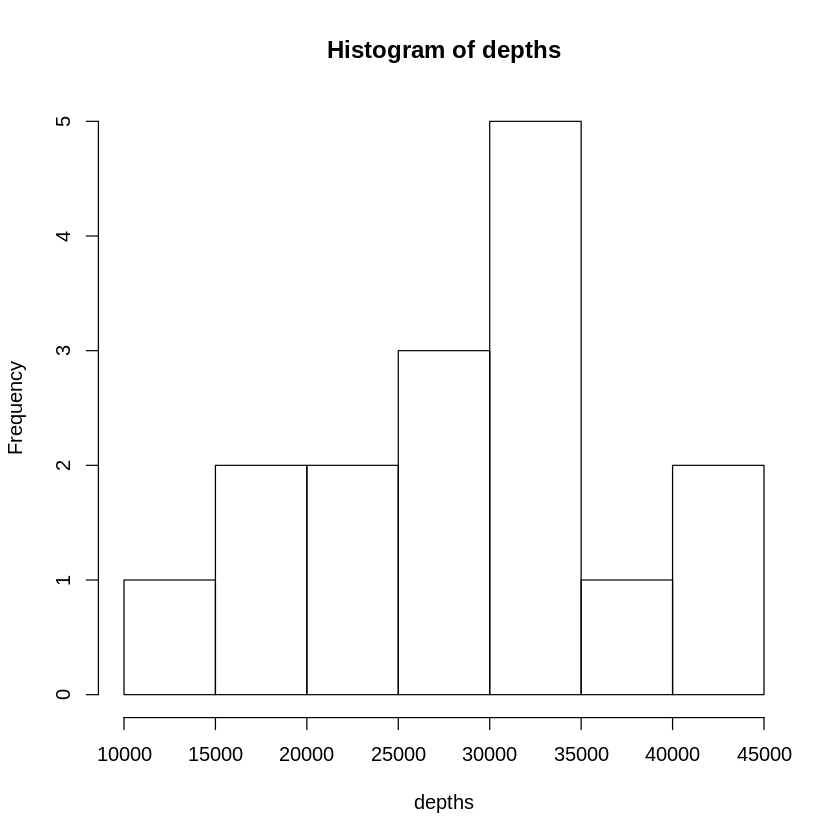

In [102]:
depths <- sample_sums(physeq.pt.time3)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time3)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time2)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time3)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time3)),25)

In [103]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time3, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time3)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

76OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [104]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time3_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 3")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000235 0.0002352 0.0164    999   0.91
Residuals 14 0.201254 0.0143753                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000235 0.0002352 0.0164    999  0.905
Residuals 14 0.201254 0.0143753                     

png 
  2

In [105]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(2)
a=adonis(d ~ Category, df, permutations=999, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.03697299,0.03697299,0.5811518,0.03985637,0.707
Residuals,14,0.89068271,0.06362019,NA,0.96014363,NA
Total,15,0.92765570,NA,NA,1.00000000,NA


## TIME POINT 4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    473   20734   24554   25974   35262   39169 

[1] "Number of Samples in our Biom Table"


[1] 15

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    473   20734   24554   25974   35262   39169 

570.T4 584.T4 577.T4 572.T4 575.T4 573.T4 581.T4 585.T4 574.T4 576.T4 582.T4 
   473  18992  19367  20508  20961  21635  21747  24554  26944  29571  33653 
578.T4 586.T4 571.T4 583.T4 
 36872  37290  37875  39169

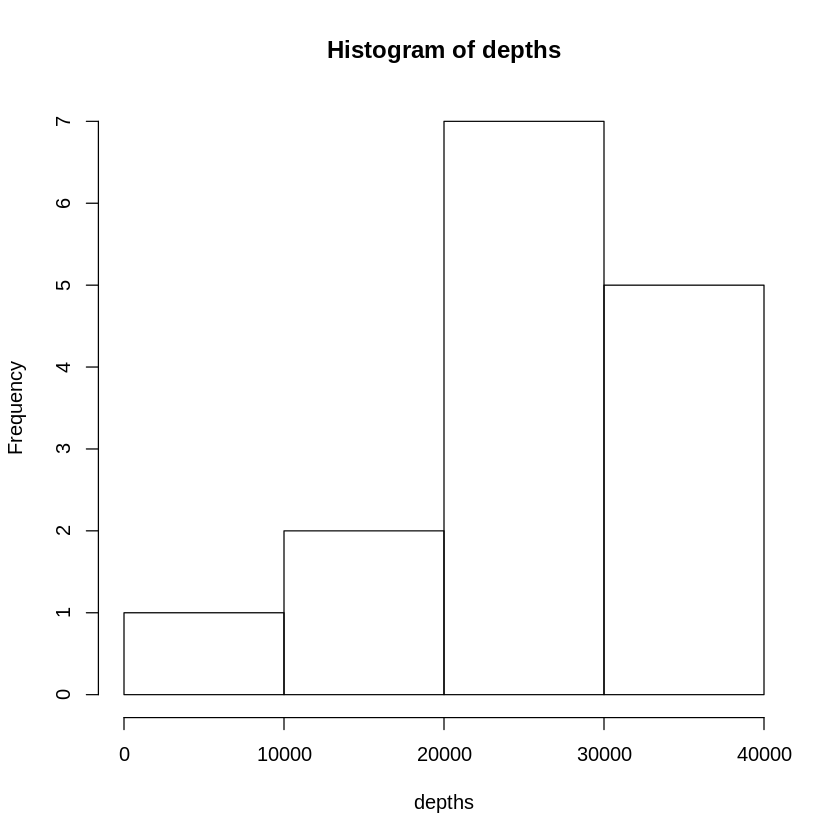

In [106]:
depths <- sample_sums(physeq.pt.time4)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time4)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time4)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time4)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time4)),25)

In [107]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time4, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time4)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

1730OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [108]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time4_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 4")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000064 0.000064 0.0131    999  0.919
Residuals 13 0.063557 0.004889                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000064 0.000064 0.0131    999    0.9
Residuals 13 0.063557 0.004889                     

png 
  2

In [109]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(2)
a=adonis(d ~ Category, df, permutations=999, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.0577443,0.05774430,0.826507,0.059777,0.569
Residuals,13,0.9082511,0.06986547,NA,0.940223,NA
Total,14,0.9659954,NA,NA,1.000000,NA


## TIME POINT 5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28976   33299   37924   37966   41816   49468 

[1] "Number of Samples in our Biom Table"


[1] 16

[1] "Number of Sequence variants we have."


[1] 2560

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28976   33299   37924   37966   41816   49468 

573.T5 578.T5 583.T5 582.T5 581.T5 576.T5 586.T5 570.T5 575.T5 585.T5 577.T5 
 28976  32130  33050  33085  33370  33786  35287  36701  39146  39337  39578 
571.T5 580.T5 584.T5 572.T5 574.T5 
 41626  42386  42490  47047  49468

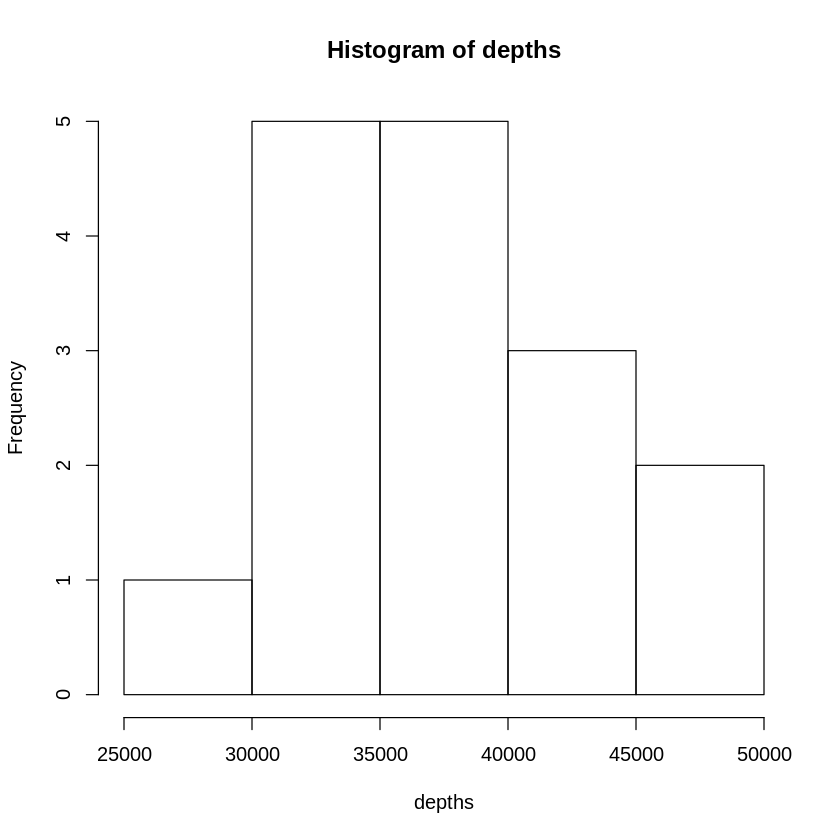

In [110]:
depths <- sample_sums(physeq.pt.time5)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq.pt.time5)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq.pt.time5)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt.time5)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt.time5)),25)

In [111]:
set.seed(123)
meta.rarefy = rarefy_even_depth(physeq.pt.time5, rngseed=1, sample.size=0.9*min(sample_sums(physeq.pt.time5)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

9OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [112]:
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "wunifrac")
#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('PCOA_Time5_ellipse.pdf', width=8, height=7)
plot(CategorybetaDNA, ellipse = TRUE, hull=F, main = "PCOA TIME 5")
#boxplot(CategorybetaDNA)
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.004355 0.0043548 0.4277    999  0.615
Residuals 14 0.142556 0.0101825                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.004355 0.0043548 0.4277    999  0.646
Residuals 14 0.142556 0.0101825                     

png 
  2

In [114]:
df = as(sample_data(meta.rarefy), "data.frame") # this is our mapping file inside our phyloseq object being converted to a dataframe
d = phyloseq::distance(meta.rarefy, "unifrac", weighted=TRUE) # distance matrix

set.seed(2)
a=adonis(d ~ Category, df, permutations=10000, method='unifrac', weighted=TRUE)
a$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,1,0.02847416,0.02847416,0.6755929,0.04603514,0.7136286
Residuals,14,0.59005678,0.04214691,NA,0.95396486,NA
Total,15,0.61853093,NA,NA,1.00000000,NA


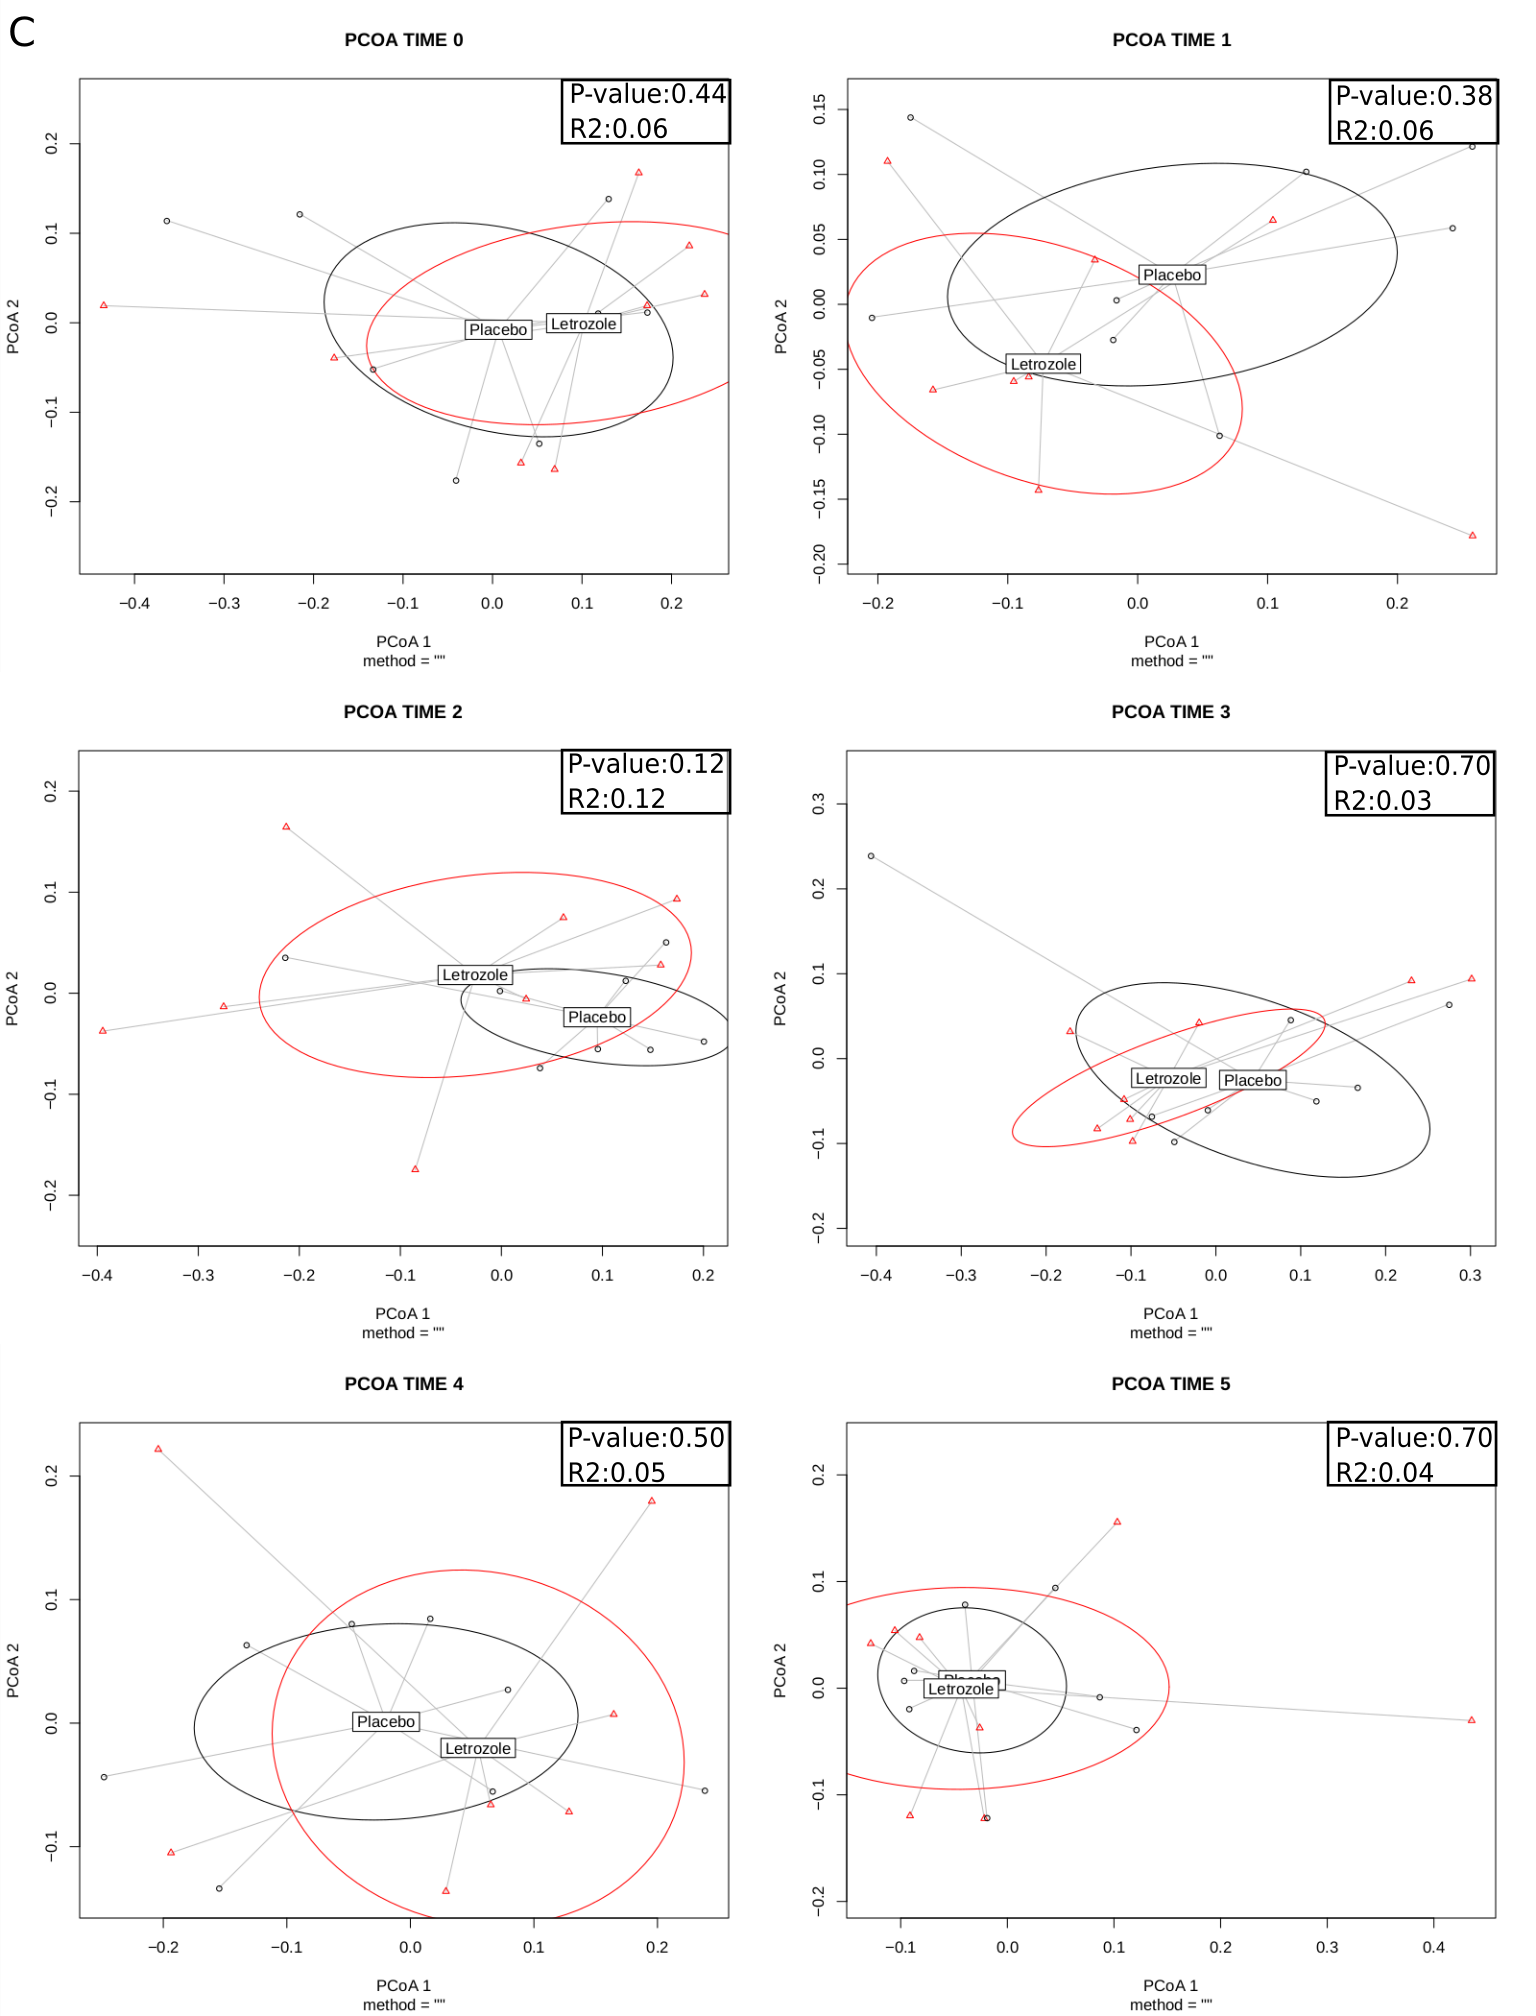